## Importing the libraries

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline, make_pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

## Importing the dataset

In [205]:
df = pd.read_csv('/content/drive/MyDrive/Biogas RMS project/Datasets/Paper 13/paper13.csv')
df.head()

,Biomass type,Reactor/feeding,VS (%),pH,OLR (g VS/l.d),HRT (d),T (°C),Reactor Volume (m³),Cumulated biogas volume (L/(g VS))
0,0,0,10.00,7.62,0.6270,19.2,55,0.0500,0.0668
1,0,2,15.30,8.00,3.1702,47.0,37,0.0473,0.6765
2,0,0,4.78,7.25,1.2400,15.0,37,0.0450,0.8227
3,0,0,4.78,7.25,1.7600,15.0,37,0.0450,0.6219
4,0,2,6.36,7.30,3.2000,25.0,35,0.0400,0.5755


## Splitting the data into Test and training data

In [206]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Cumulated biogas volume (L/(g VS))'])
y = df['Cumulated biogas volume (L/(g VS))']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Pipeline information

(Since this data does not have missing values, not imputation is required.)

The following transformers will be applied in the pipeline.

Step 1: OneHotEncoding the categorical columns. 

Step 2: Scaling using StandardScaler





In [207]:
# 1. One Hot Encoding
trf0 = ColumnTransformer(transformers = [
    ('ohe0', OneHotEncoder(drop='first'), ['Biomass type','Reactor/feeding'])
], remainder='passthrough')

In [208]:
# 2. Scaling
#  Scaling only the temperature column
trf2 = ColumnTransformer([
    ('scale', StandardScaler(), slice(6,12))
], remainder = 'passthrough')

## Creating the pipeline

In [209]:
pipe = Pipeline([
    ('ohe0', trf0),
    ('scaling', trf2)
])

# Display Pipeline

from sklearn import set_config
set_config(display='diagram')
# Show the steps involved in the pipeline
pipe.named_steps


{'ohe0': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe0', OneHotEncoder(drop='first'),
                                  ['Biomass type', 'Reactor/feeding'])]),
 'scaling': ColumnTransformer(remainder='passthrough',
                   transformers=[('scale', StandardScaler(),
                                  slice(6, 12, None))])}

## Transforming data using pipeline

In [210]:
# Visualize 
X_trans = pipe.fit(X)
X_train_trans = pipe.transform(X_train)
X_test_trans = pipe.transform(X_test)
X_pd = pd.DataFrame(X_test_trans)
X_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.660635,-0.962779,-0.744619,0.114379,-0.486186,-0.270083,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.542052,-0.526965,-0.020187,-0.529037,2.292019,0.201716,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.173327,-1.398594,-0.605676,-0.529037,-0.486186,0.201716,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.801455,-0.373148,0.160544,-0.207329,-0.208365,1.499164,1.0,0.0,0.0,0.0,0.0,1.0
4,0.566306,1.113748,-0.985996,1.401212,-0.208365,-0.830345,0.0,1.0,0.0,0.0,0.0,0.0


## Building the ANN

Basic model with 2 hidden layers, 32 neurons each.

In [211]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim= 12))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                416       
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(loss='mse', optimizer='Adam')

## Fitting the model
While fitting the model, it uses a validation set to calculate the accuracy of the data at every epoch.

In [213]:
history = model.fit(X_train_trans, y_train, epochs=500, validation_split=0.20)

Epoch 1/500
3/3 [==============================] - 0s 59ms/step - loss: 0.5804 - val_loss: 0.3613
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 0.4178 - val_loss: 0.3204
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3047 - val_loss: 0.3106
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2325 - val_loss: 0.3106
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1881 - val_loss: 0.3059
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1598 - val_loss: 0.2947
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 0.1443 - val_loss: 0.2723
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1288 - val_loss: 0.2318
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 0.1116 - val_loss: 0.1906
Epoch 10/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0957 - val_loss: 0.1555
Epoch 11/500
3/3 [=

## Plotting graphs of the training history

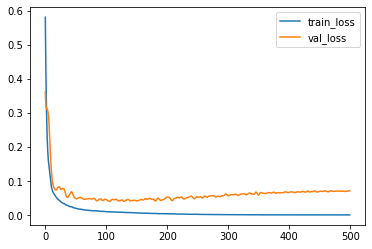

In [214]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## Results on the test set

In [215]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_trans)
r2_score(y_test, y_pred)

1/1 [==============================] - 0s 47ms/step


0.4450836509013103

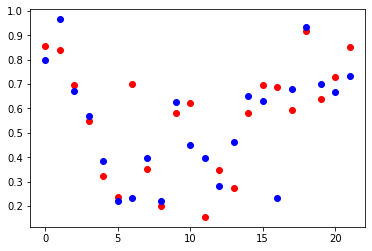

In [216]:
plt.scatter(range(0, y_test.size), y_test, color='r')
plt.scatter(range(0, y_test.size), y_pred, color='b')

## Printing the weights and biases

In [217]:
# model.layers[0].get_weights()